Step 1:  Gather data, determine data collection method, and provenance of the data

From the suggested sources, I checked UCI ML data repository, Kaggle and Data.gov.  The UCI ML data repository lead to a 404 page, so then I focused on the US government website since I would rather try something interesting to me and less likely to have been part of a Machine Learning project.  However, after spending time examining several dozen data examples I realized while the government collected a lot of data, most of the data by themselves do not lead to testable hypothesis that is suitable to be analyzed by human or machine.  

For example, a data set provided the daily precipitation levels for all counties a US state, but without knowing other information such as weather conditions or events like flooding, this data was not useful for this project.  Many data files are like this.  

Another example was the low-income assistance claims filed by counties in New York along with income level, number of people in a household, the year, and the county itself.  While there is certainly some relationship between income level and number of claims, other potentially more important factors such as education, level of community outreach are clearly missing.  So while this data set could be examined, it most likely would not yield anything interesting conclusions.

Therefore, I tried the Kaggle website and found, among the first sets of data, a set of fitbit data.  As an user of fitbit previously and as a person who is very interested in health, fitness and longevity, this piqued my interest.  After downloading the zip file and taking a look of the contents, I decided I would use this data set to examine the potential relationship between number of sleep minutes and exercise, activity, weight (the only likely relevant variables provided in the data set.)



1A Data (Downloaded from https://www.kaggle.com/datasets/arashnic/fitbit?resource=download)

arashnic (n.d.). Fitbit Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/arashnic/fitbit?resource=download

The Data, when unzipped, contains 2 data folders of two different date ranges.  

I chose the set with data from 4.12.2016 to 5.12.2015.  When this was unzipped, it contains 18 total csv files, totaling 300MB in csv files.


Step 2: Identify a Supervised Machine Learning Problem

I will be examining the correlation and/or causal relationship of various fitbit activity and exercise data to that of sleep data, if any is present.  Since sleep hours is correlated to stress (mental, physical, work demand) and physical activity may correlate with that because more physical activity may correlate with 
    1. more free time and less stress -> better sleep
    2. greater income/wealth since gym membership and trainer cost money -> more time sleep
    3. better health -> sleep more easily 
    4. release of dopamine and serotonin -> sleep more easily

I anticipate there probably is some relationship but I have no idea how strong a relationship (correlation) might be present and if ML might come to a different conclusion than human.  I am also curious to see how exercise Intensity may impact sleep duration.

***
I intend to use tools learned in this semester for this project.  I will (attempt) to use the following algorithms and SVM ML method to examine the data.
    1. linear regression, colinearity analysis, correlation analysis + heat map, pair plot, 
    2. ML methods such as linear regression (poor to average), multivariate regression (good), logistic regression (average?), KNN decision tree (very poor to poor), adaboost (not sure), random forest (not sure), SVM (hopefully good to very good)

***
Need to give explanation of what the project is about and clearly states both the type of learning/algorithms and type of task

Step 3: Exploratory Data Analysis (EDA) - Inspection, Visualize and Clean the Data

3A) Initial examination:
The Fitbit dataset has the following set of files
    1. dailyActivity
    2. dailyCalories
    3. dailyIntensities
    4. dailySteps
    5. heartrate_seconds
    6. hourlyCalories
    7. hourlyIntensities
    8. minuteCaloriesNarrow
    9. minuteCaloriesWide
    10.minuteIntensitiesNarrow
    11.minuteIntensitiesWide
    12.minuteMETsNarrow
    13.minuteMETsWide
    14.minuteSleep
    15.minuteStepsNarrow
    16.minuteStepsWide
    17.sleepDay
    18.weightLogInfo

Many of the files have overlapping and/or duplicated data, so it wasn't necessary to combine all the files into a single merged file.  Furthermore, certain files and their data, such as hourlyCalories or hourlyIntensities, does not lend well toward helping find correlation factors for sleep hours (quality sleep).  While I could total the hourly Calories into daily quantities, that information is already available in dailyCalories and dailyActivity files.

So after looking through the data included in the files, I decided to do an initial trim to the following files.
    1. dailyActivity - minutes of activity or exercise total and in different intensity categories
    2. dailyCalories - caloric intake
    3. dailySteps - since 10K daily steps has been promoted a lot for better health, I wanted to see there's any correlation
    4. WeightLogInfo - want to see if weight or obesity might play a role in sleep
    


In [3]:
# Initial merge of data
import pandas as pd

# List of csv files
files = ['sleepDay_merged.csv', 'dailyActivity_merged.csv', 'dailyCalories_merged.csv', 'dailySteps_merged.csv', 'weightLogInfo_merged.csv']

df = pd.read_csv(files[0])
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index(['Id', 'Date'])

# Loop over the rest of the csv files
for i, file in enumerate(files[1:], 1):
    temp_df = pd.read_csv(file)
    temp_df['Date'] = pd.to_datetime(temp_df['Date']).dt.date
    temp_df = temp_df.set_index(['Id', 'Date'])

    df = df.join(temp_df, how='outer', lsuffix='_file'+str(i), rsuffix='_file'+str(i+1))

# Save the merged data to a new csv file
df.to_csv('initial.csv')

/var/folders/b_/gx_b261j6736m8c3_xd6qcb9d9zn9c/T/ipykernel_19399/953998242.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']).dt.date
/var/folders/b_/gx_b261j6736m8c3_xd6qcb9d9zn9c/T/ipykernel_19399/953998242.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df['Date'] = pd.to_datetime(temp_df['Date']).dt.date
/var/folders/b_/gx_b261j6736m8c3_xd6qcb9d9zn9c/T/ipykernel_19399/953998242.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp_df['Date'] = pd.to_datetime(temp_df['Date']).dt.date
/var/folders/b_/gx_b261j6736m8c3_

3B Post merging - Initial Examination of merged (initial.csv) file

Unsurprisingly, there's a lot of data (27 columns, 944 rows), with some blank spaces in certain rows or columns.  Clearly data cleaning is needed.

Wrote code to examine visually quickly problem area(s) that need to be dealt with.

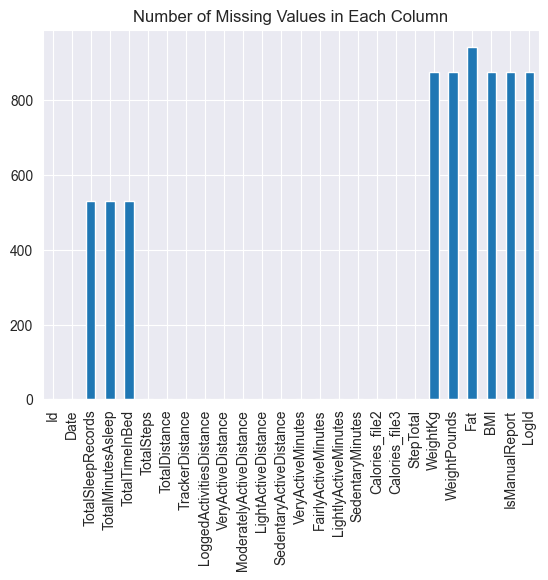

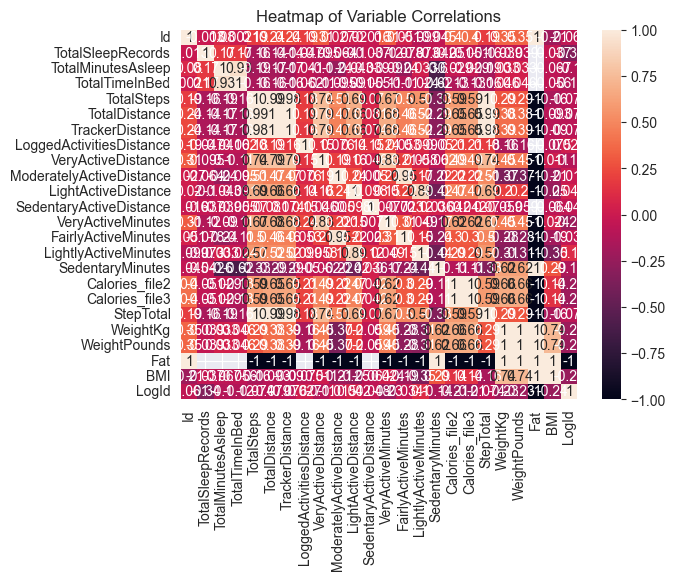

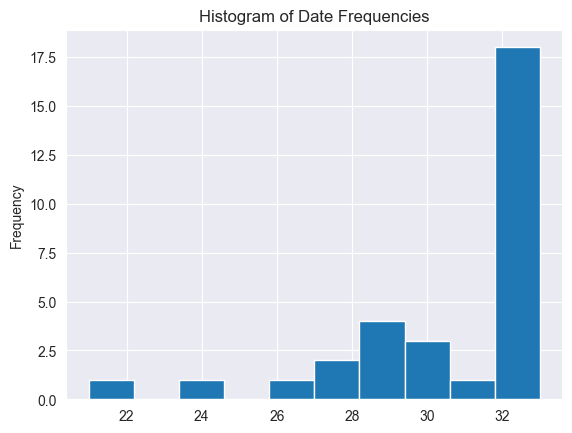

In [4]:
# checking for problems, like blanks, in a visual way
# vis-initial.py
import pandas as pd

df = pd.read_csv('initial.csv')

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()


import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
missing_values.plot(kind='bar')
plt.title('Number of Missing Values in Each Column')
plt.show()

import seaborn as sns

correlation_matrix = numeric_df.corr()
# correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

df['Date'].value_counts().plot(kind='hist')
plt.title('Histogram of Date Frequencies')
plt.show()


3C. Initial Data Cleaning

1. Looking at the files, it is clear the data sets are not collected from the same user set, and not necessarily the same dates. 
2. In the graph of variables with missing data (blanks), there are multiple columns that are missing hundreds of data points (out of 943), which clearly needed dealing with.
3. Looking at the heatmap, a number of variables correlate poorly (~0) that also needs dealing with.
4. Furthermore, a great number of unexpected issues arose, which I summarized as a list of TODO below to be dealt with.


TODO List
1. Change the name of the date column to Date for all files so they match (because that column was named differently in different files.)
2. Get rid of the non-matching data if the data sets don't have the same user with data on the same date.
3. Clean up clearly non-relevant data columns or information I don’t want to examine, at least not initially.  I want to test my understanding of ML with a smaller number of variables (perhaps about 12) before (if time permits) looking at all relevant and irrelevant data and see if ML can identify non-correlating
    a. based on heatmap, blank graph, and visual examination of data, remove non-relevant data
    b. clean up blank rows or columns (i.e. dates with excessive blank data or variable with excessive blank data, like weight)
4. Strip out hour data from Date data column in the source data files
5. Combine (add) data columns to form a merged file.
6. Examine merged file
7. Remove rows that contain blank data
8. Remove unwanted columns
9. Remove Weight data because after merging files, only a tiny subset (<30 users) have reported weight information

The result merged file is the base file for initial testing.



In [ ]:
# cleaner script
# cleaner.py
import pandas as pd

# List of csv files
files = ['sleepDay_merged.csv', 'dailyActivity_merged.csv', 'dailyCalories_merged.csv', 'dailySteps_merged.csv', 'weightLogInfo_merged.csv']

df = pd.read_csv(files[0])
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index(['Id', 'Date'])

# Loop over the rest of the csv files
for i, file in enumerate(files[1:], 1):
    temp_df = pd.read_csv(file)
    temp_df['Date'] = pd.to_datetime(temp_df['Date']).dt.date
    temp_df = temp_df.set_index(['Id', 'Date'])

    # Join with the main dataframe (df) based on the index ('id' and 'Date')
    df = df.join(temp_df, how='outer', lsuffix='_file'+str(i), rsuffix='_file'+str(i+1))

# Remove rows where 'TotalMinutesAsleep' is blank
df = df.dropna(subset=['TotalMinutesAsleep'])

# Strip out unwanted data columns
columns_to_remove = ['TotalSleepRecords', 'Loggedactivitiesdistance', 'StepTotal', 'TrackerDistance', 'Calories_file3', 'SedentaryActiveDistance', 'Fat', 'WeightKg', 'BMI', 'IsManualReport', 'WeightPounds', 'LoggedActivitiesDistance', 'LogId']

for column in columns_to_remove:
    if column in df.columns:
        df = df.drop(columns=[column])

# Rename 'Calories_file2' column to 'Calories'
if 'Calories_file2' in df.columns:
    df = df.rename(columns={'Calories_file2': 'Calories'})

# Save the merged data to a new csv file
df.to_csv('merged.csv')


3D - Post Cleaning Examination of the merged.csv file

The merged data file has 14 columns and 414 rows of relevant and potentially useful data.  There are still enough sufficient number of variables (columns) that makes this a complex problem worth tackling and enough (hopefully) 413 data sets for both training ML model and testing it.

Run the same visualization code to take a look and see how things improved.

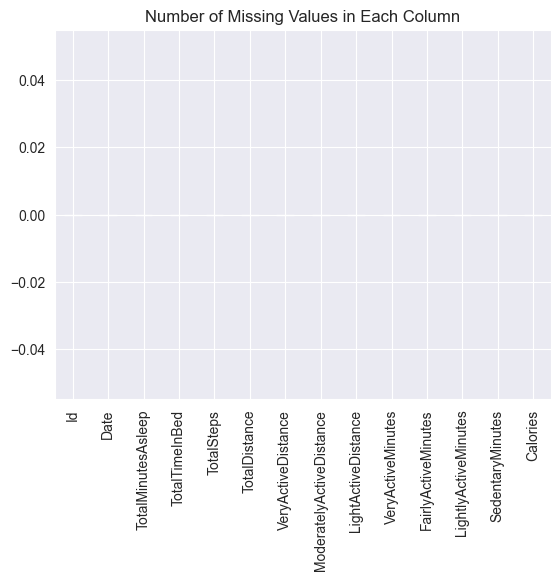

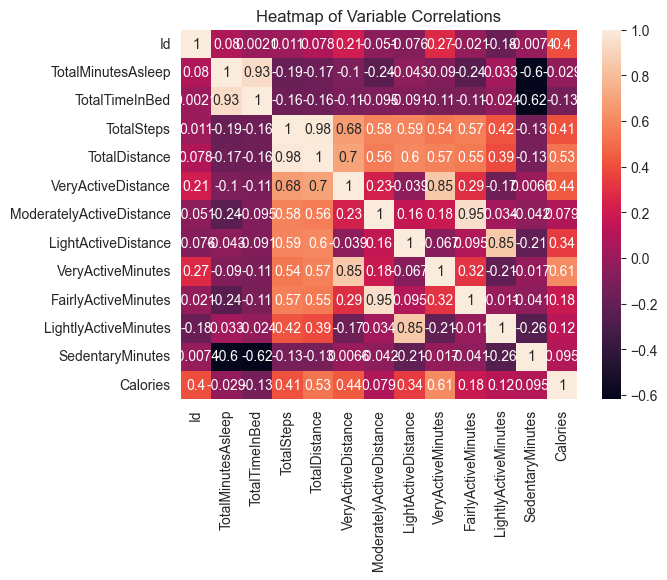

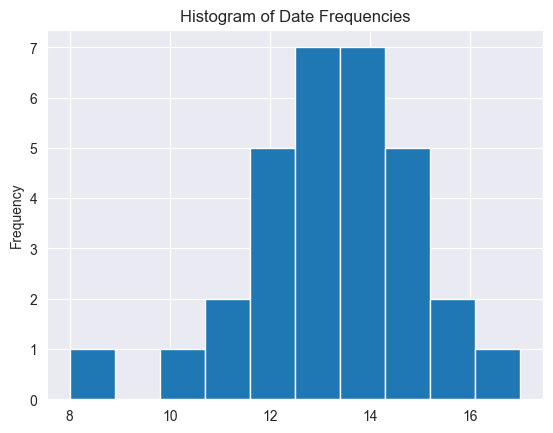

In [2]:
# checking for problems, like blanks, in a visual way
# vis-merged.py
import pandas as pd

df = pd.read_csv('merged.csv')

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()


import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
missing_values.plot(kind='bar')
plt.title('Number of Missing Values in Each Column')
plt.show()

import seaborn as sns

correlation_matrix = numeric_df.corr()
# correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

df['Date'].value_counts().plot(kind='hist')
plt.title('Histogram of Date Frequencies')
plt.show()


3D Continued.

1. No more missing values in any of the remaining variables (columns)
2. Heatmap show a number of variables have high correlation with sleep and other variables.  Surprisingly, but perahps I shouldn't be, is some variables show negative correlation!
3. Histogram didn't seem to provide any obviously useful data.

3E Exploratory Data Analysis 

Look for possible relationship (i.e. correlation, colinearity, etc)

explanation on each to follow

Correlation (Heat Map) - (use correlation-heatmap.py)

Correlation (each variable with SleepMinutes) - (correlation.py)

***
need analysis and discussion of correlation
***

Colinearity (graphical) - (colinearity-graph.py)

Colinearity with values to better see - (colinearity.py)

***
Need analysis and discussion of colinearity
***

Check for presence of significant outliers in each variable (column) via box plot - boxplot.py

***
need analysis and discussion for the boxplots
toss in graph analyzer 
***

Check Histogram of TotalMinutesAsleep to see if any weird outcome is seen.  Gaussian distribution is expected.
histogram-sleep.py

Check Histograms of remaining variables (except ID and Date)
histogram.py

***
analyze and discuss, three major types.  gaussian, left skewed, right skewed
***






Traditional Analysis

1. Pair Plot
    (pairplot.py); perform analysis and discussion
    1. briefly discuss ones with correlation with sleep minutes
        1. briefly discuss with variables have colinearity with each other...; no clear trends in most cases.  the strongest relationship is minutes slept vs minutes in bed, not surprising but not terribly useful
   
2. Linear Regression (linearregression.py)


Machine Learning

1. Linear Regression ML model - (linearregression-ML.py), identified top 3 predictors based on R2, used machine learning.  Discuss, similar results obtained in ML vs traditional stats, slightly worse R2 even.

2. Multi Regression ML model - (multiregression-ML.py) see adjusted R2 vs number of predictors (up to 5); discuss results vs standard ML

3. Logistic Regression ML model (logisticregression-ML.py)

4. Non-Parametric ML model - (KNN-tree.py) - Not expected to do well in multivariate analysis since KNN is usually used to find nearest neighbors.  I attempted to use it but got very poor results, with KNN accuracy of only 0.012, which indicates the model is not well suited for this dataset.  Even pruning the decision tree (KNN-tree-pruned.py) the accuracy only improved to 0.024 which is still extremely poor, thus proving KNN method alone is unsuitable method.

5. adaboost (adaboost-ML.py)
6. 
6. random forest (random-forest-ML.py)
    model results are comparable to multivariate regression, with R2=0.571.  Tuning showed only a little improvement, with R2=0.589


Conclusion:
    The best models all have R2 approx 0.60, which suggest the variables in the data cannot fully (nor come very close) to explain or correlate to TotalSleepMinutes, which is actually not surprising to me.  In the initial hypothesis I made, I did not expect exercise to have a very significant impact on one's ability to sleep.  What was surprising is SedentaryMinutes actually have nearly 0.6 correlation with TotalSleepMinutes and that the relationship is actually negative!  The more sedentary a person is, the less sleep one got on average.
    
7. SVM (svm-scaling.py, svm-scaling-tuned.py, svm-scaling-tuned2.py, svc-graphs.py)
    Tested linear, RBF, and polynomial SVM models with different parameters (C, gamma, 

Plan to use SVM model, thus examine is data needs to be transformed (i.e. log transform or other methods)
- need to deal with missing data.  already completed as part of cleaning of data
- based on histogram, the data are either normally (gaussian) distributed or skewed but with scales of the data reasonably close, so no log transformation is needed
- try to standardize data and see if that make any significant impact; but the results is squashed and weird looking and not useful
- svm-scaling.py was used to standardize data and histogram generated 